In [1]:
# 1.Load the data file using pandas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('googleplaystore.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.shape

(10841, 13)

In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
# 2.Check for null values in the data. Get the number of null values for each column.
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# 3.Drop records with nulls in any of the columns.
df.dropna(subset=['Content Rating'],axis=0,inplace=True)

In [8]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [9]:
#4.Variables seem to have incorrect type and inconsistent formatting. You need to fix them:


df['Size'] = df['Size'].str.extract('(\d+\.?\d*)').astype(float)


In [10]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [11]:
#from size mb to kb
df['Size']=df['Size']*1000

In [12]:
df['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10836    53000.0
10837     3600.0
10838     9500.0
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [13]:
# 4.2.Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
df.Reviews=df.Reviews.astype("int32")

In [14]:
df.Reviews.describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [16]:
# 4.3.Installs field is currently stored as string and has values like 1,000,000+.
df['Installs']=df['Installs'].apply(lambda x: x.replace('+','').replace(',',''))

In [17]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: object

In [18]:
df.Installs.describe()

count       10840
unique         20
top       1000000
freq         1579
Name: Installs, dtype: object

In [19]:
#4.4 Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
df['Price'] = df['Price'].str.replace('$','').apply(pd.to_numeric,1)

/tmp/ipykernel_70/2935304096.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$','').apply(pd.to_numeric,1)


In [20]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [21]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10840, dtype: float64

In [22]:
# 5.1 Sanity check
#Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
df[(df["Rating"]<1) | (df["Rating"]>5)]
df = df.drop(df[(df["Rating"]<1) | (df["Rating"]>5)].index)

In [23]:
df.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [25]:
#5.2) Reviews should not be more than installs as only those who installed can review the app
df[df.Reviews>df.Installs]

TypeError: '>' not supported between instances of 'int' and 'str'

In [26]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int32

In [27]:
#3) For free apps price should be equal to 0
df[(df['Type']=='free')& (df['Price'] ==0)].shape[0]

0

In [28]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [29]:
#6 Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#6.1 Box Plot for Price
sns.set(rc={'figure.figsize':(10,6)})

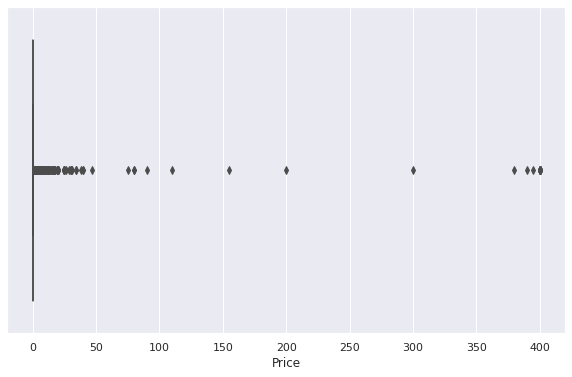

In [31]:
sns.boxplot(x= 'Price',data= df);

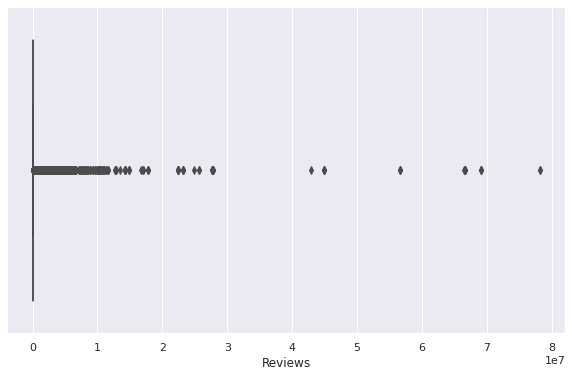

In [32]:
sns.boxplot(x= 'Reviews',data= df);

(array([  17.,   18.,   41.,   74.,  137.,  446.,  879., 1662., 4175.,
        1917.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

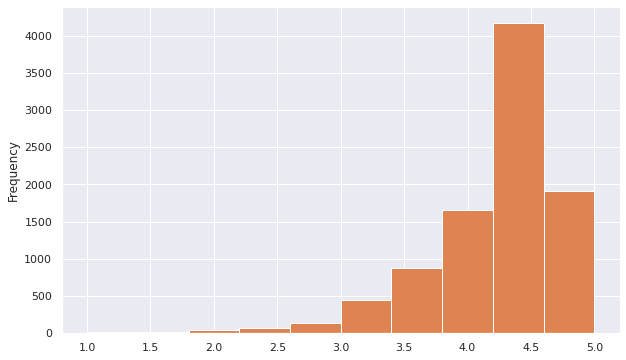

In [33]:
#6.2 Histogram for Rating
sns.set(rc={'figure.figsize':(10,6)})
df['Rating'].plot(kind= 'hist'); #we can use either to get the results
plt.hist(df['Rating'])

(array([8879.,   38.,   37.,   32.,   28.,   27.,   25.,   25.,   27.,
          27.]),
 array([1.000e+03, 1.029e+05, 2.048e+05, 3.067e+05, 4.086e+05, 5.105e+05,
        6.124e+05, 7.143e+05, 8.162e+05, 9.181e+05, 1.020e+06]),
 <BarContainer object of 10 artists>)

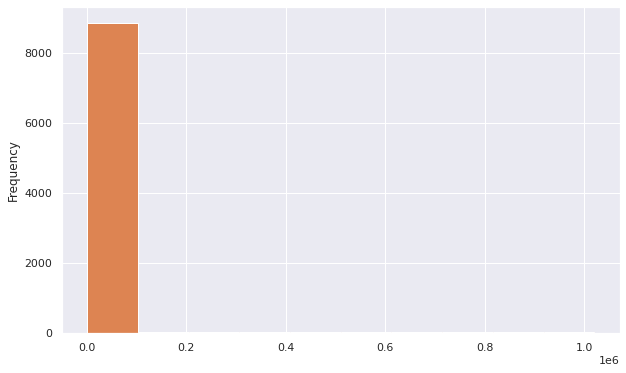

In [34]:
#6.3 Histogram for Size
sns.set(rc={'figure.figsize':(10,6)})
df['Size'].plot(kind= 'hist') #we can use either to get the results
plt.hist(df['Size'])

In [35]:
#I) price of $200 and above for an application is expected to be very high
df[df['Price']>200].index.shape[0] #we can use either to get the results
df.loc[df['Price']>200].shape[0]

17

In [36]:
# 6.4 Dropping the Junk apps
df.drop(df[df['Price']>200].index, inplace= True)

In [37]:
df.shape

(10823, 13)

In [38]:
df.loc[df['Reviews']>2000000].shape[0]

453

In [39]:
df[df.Reviews>2000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,NaN,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


In [40]:
df=df[df.Reviews<=2000000].copy()

In [41]:
df.shape

(10370, 13)

In [42]:
#6.5 Dropping high installed apps
df.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99], axis=0)

,Rating,Reviews,Size,Price
0.10,3.5,2.00,2900.0,0.00
0.25,4.0,31.00,5500.0,0.00
0.50,4.3,1545.50,14000.0,0.00
0.70,4.5,23070.80,27000.0,0.00
0.90,4.7,246833.70,61000.0,0.00
0.95,4.8,547851.35,89000.0,1.99
0.99,5.0,1377735.16,662600.0,8.49


<AxesSubplot: xlabel='Rating', ylabel='Price'>

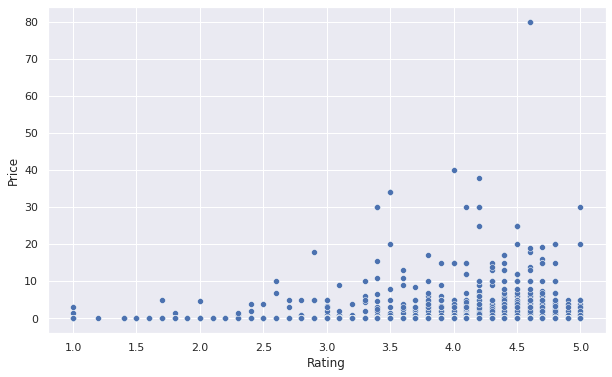

In [43]:
# 7.1.Make scatter plot/joinplot for Rating vs. Price
sns.scatterplot(x = 'Rating', y = 'Price',data=df)

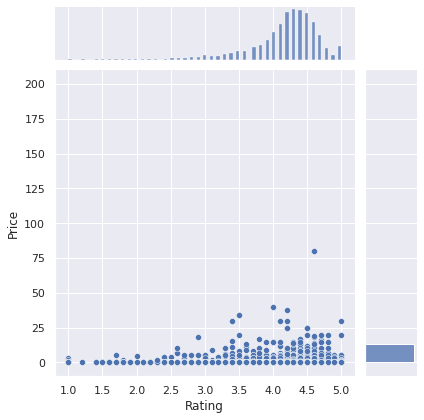

In [44]:
sns.jointplot(x= 'Rating',y= 'Price',data= df)

<AxesSubplot: xlabel='Rating', ylabel='Size'>

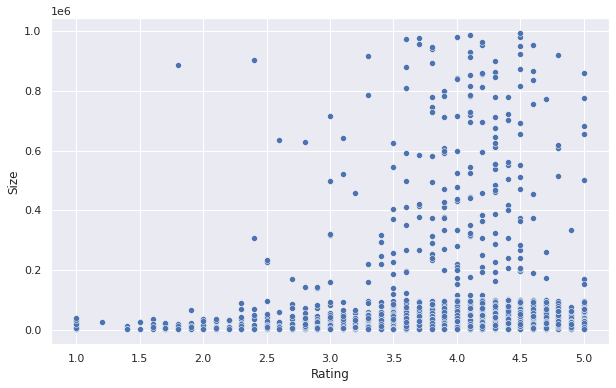

In [45]:
#2) Scatterplot/jointplot for Rating Vs. Size
sns.scatterplot(x= 'Rating',y= 'Size', data= df)

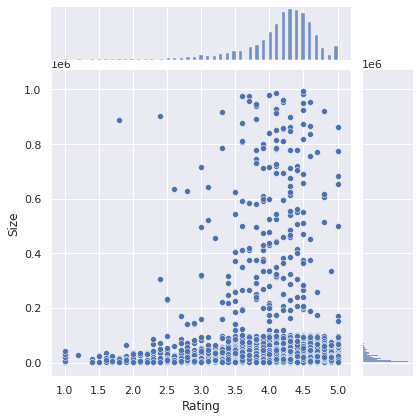

In [46]:
sns.jointplot(x= 'Rating', y= 'Size', data= df)

<AxesSubplot: xlabel='Rating', ylabel='Reviews'>

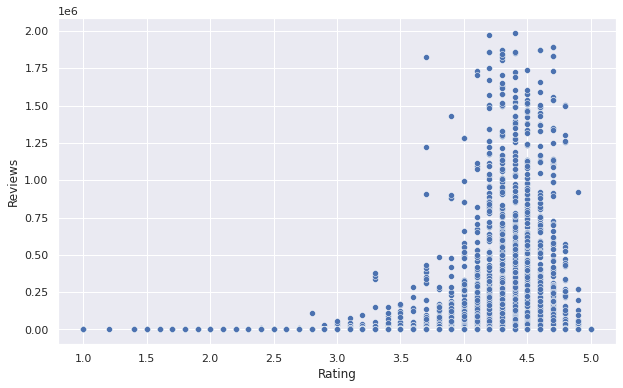

In [47]:
#3) Scatterplot for Ratings Vs. Reviews
sns.scatterplot(x= 'Rating',y= 'Reviews', data= df)

<AxesSubplot: xlabel='Rating', ylabel='Content Rating'>

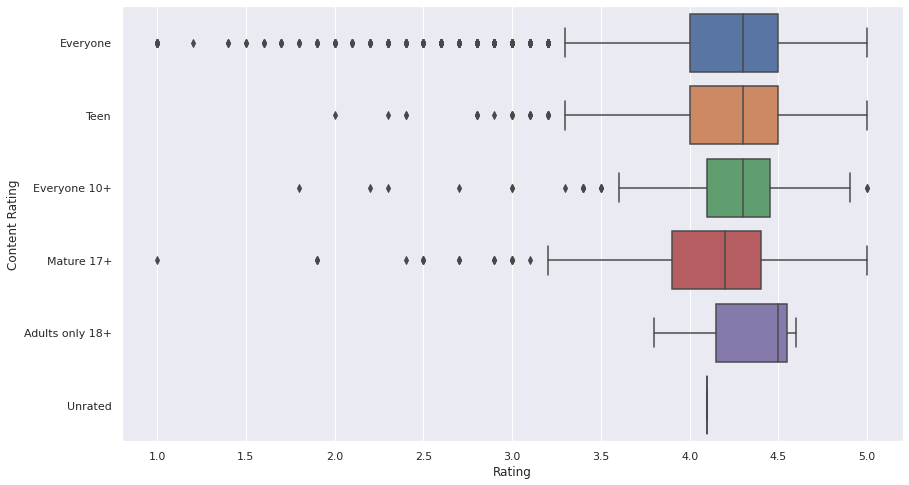

In [48]:
#4) Boxplot for Ratings Vs. Content Rating
sns.set(rc={'figure.figsize':(14,8)})
sns.boxplot(x= 'Rating', y= 'Content Rating', data = df)

<AxesSubplot: xlabel='Rating', ylabel='Category'>

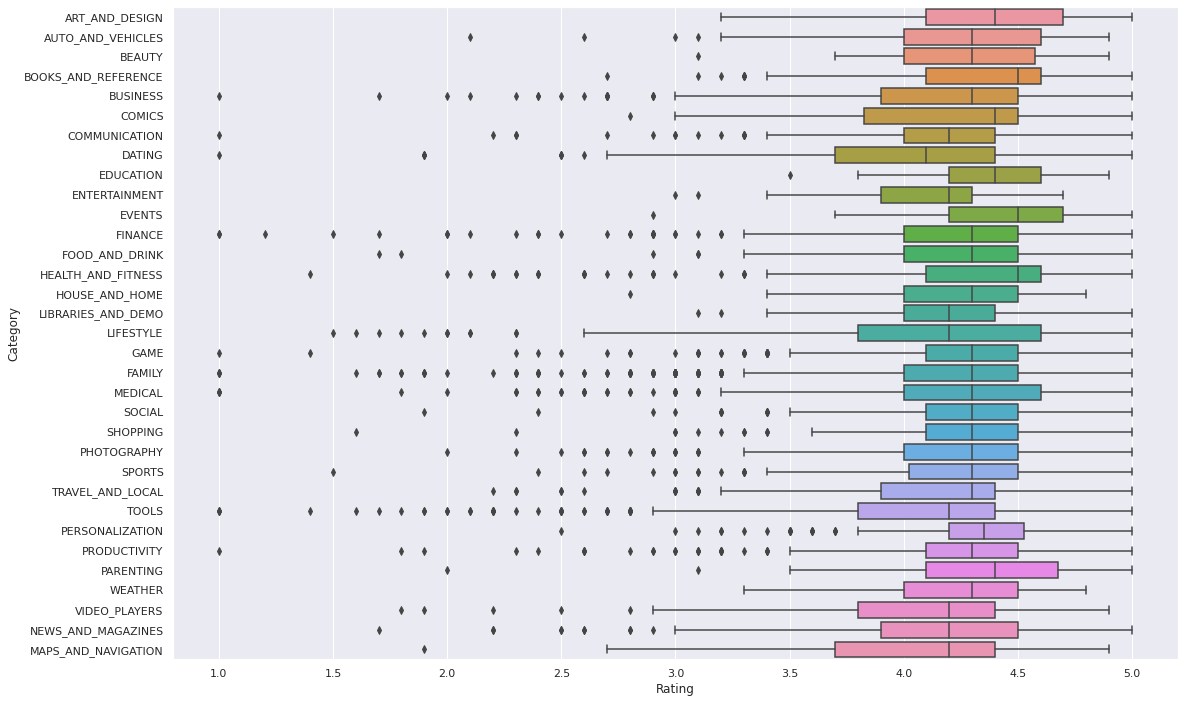

In [49]:
#5) Boxplot for Ratings Vs. Category
sns.set(rc={'figure.figsize':(18,12)})
sns.boxplot(x= 'Rating', y = 'Category', data= df)

In [50]:
# 8 data preprocessing
# creating a copy of the data(df) to make all edits
inp1= df.copy()

In [51]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
inp1['Size'] = inp1['Size'].str.extract('(\d+\.?\d*)').astype(float)

AttributeError: Can only use .str accessor with string values!

In [53]:
inp1['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10836    53000.0
10837     3600.0
10838     9500.0
10839        NaN
10840    19000.0
Name: Size, Length: 10370, dtype: float64

In [54]:
inp1.Reviews=inp1.Reviews.astype("float32")

In [55]:
inp1.Reviews.describe()

count      10370.000
mean       89896.750
std       250285.875
min            0.000
25%           31.000
50%         1545.500
75%        38583.750
max      1986068.000
Name: Reviews, dtype: float64

In [56]:
inp1['Installs']=inp1['Installs'].apply(lambda x: x.replace('+','').replace(',',''))

In [57]:
inp1['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10370, dtype: object

In [58]:
inp1.skew()

/tmp/ipykernel_70/3545313420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inp1.skew()


Rating      -1.788938
Reviews      4.163041
Size         6.813609
Installs    21.032209
Price       29.726704
dtype: float64

In [59]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9500.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [60]:
inp1.skew()

/tmp/ipykernel_70/3545313420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inp1.skew()


Rating      -1.788938
Reviews      4.163041
Size         6.813609
Installs    21.032209
Price       29.726704
dtype: float64

In [61]:
inp1['Reviews']=np.log(inp1['Reviews'])

/usr/local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [62]:
inp1['Reviews']

0         5.068904
1         6.874198
2        11.379508
3        12.281384
4         6.874198
           ...    
10836     3.637586
10837     1.386294
10838     1.098612
10839     4.736198
10840    12.894979
Name: Reviews, Length: 10370, dtype: float32

In [63]:
inp1['Installs']=np.log(inp1['Installs'])

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [64]:
inp1['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10370, dtype: object

In [65]:
inp1.drop(['Last Updated','Current Ver','Android Ver','App'], axis=1, inplace= True)
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.068904,19000.0,10000,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.874198,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379508,8700.0,5000000,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281384,25000.0,50000000,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.874198,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity


In [66]:
inp1.shape

(10370, 9)

In [67]:
#3) create a copy of dataframe
inp2 = inp1

In [68]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.068904,19000.0,10000,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.874198,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379508,8700.0,5000000,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281384,25000.0,50000000,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.874198,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity


In [69]:
#get unique values in column category
inp2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [70]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.068904,19000.0,10000,Free,0.0,Everyone,Art & Design,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.874198,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379508,8700.0,5000000,Free,0.0,Everyone,Art & Design,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281384,25000.0,50000000,Free,0.0,Teen,Art & Design,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.874198,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#get unique values in Column Genres
inp2["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual',
       'Casual;Pretend Play', 'Action', 'Puzzle', 'Arcade', 'Music',
       'Word', 'Racing', 'Casual;Creativity', 'Sports', 'Simulation',
       'Board', 'Role Playing', 'Adventure', 'Strategy',
       'Simulation;Education', 'Action;Action & Adventure', 'Trivia',
     

In [72]:
#Create an empty list
lists = []
#Get the total genres count and gernes count of perticular gerner count less than 20 append those into the list
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
#changing the gerners which are in the list to other
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres]

In [73]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Card', 'Casual', 'Casual;Pretend Play', 'Action',
       'Puzzle', 'Arcade', 'Music', 'Word', 'Racing', 'Sports',
       'Simulation', 'Board', 'Role Playing', 'Adventure', 'Strategy',
       'Trivia', 'Educational;Education', 'Racing;Action & Adventure',
       'Medical', 'Social', 'Shopping', 'Photography', 'Travel & Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players & Editors', 'News & Magazines', 'Maps & Navigation',
       'Educational', 'Casino'], dtype=object)

In [74]:
#Storing the genres column into x varible and delete the genres col from dataframe inp2
#And concat the encoded cols to the dataframe inp2
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)

In [75]:
inp2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.068904,19000.0,10000,Free,0.0,Everyone,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.874198,14000.0,500000,Free,0.0,Everyone,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379508,8700.0,5000000,Free,0.0,Everyone,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281384,25000.0,50000000,Free,0.0,Teen,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.874198,2800.0,100000,Free,0.0,Everyone,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#getting the unique values in Column "Content Rating"
inp2["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [77]:
#Applying one hot encoding 
#Storing the Content Rating column into x varible and delete the Content Rating col from dataframe inp2
#And concat the encoded cols to the dataframe inp2
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Type,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.068904,19000.0,10000,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.874198,14000.0,500000,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379508,8700.0,5000000,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,12.281384,25000.0,50000000,Free,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,6.874198,2800.0,100000,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [78]:
inp2.shape

(10370, 99)

In [79]:
#9. Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.

#10. Separate the dataframes into X_train, y_train, X_test, and y_test


In [80]:
#importing the neccessary libraries from sklearn to split the data and and for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics

In [81]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)


In [82]:
df_train.shape, df_test.shape

((7258, 99), (3112, 99))

In [83]:
y_train = df_train.pop("Rating")
X_train = df_train

In [84]:
y_test = df_test.pop("Rating")
X_test = df_test

In [85]:
# Model Building & Evaluation
# 11. Model building Use linear regression as the technique Report the R2 on the train set

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr = LinearRegression()

In [88]:
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'Free'

In [89]:
#Report the R2 on the train set

from sklearn.metrics import r2_score

y_train_pred= lr.predict(X_train)

r2_score(y_train, y_train_pred)

ValueError: could not convert string to float: 'Free'

In [90]:
#12.Make predictions on test set and report R2.

y_test_pred= lr.predict(X_test)

r2_score(y_test, y_test_pred)

ValueError: could not convert string to float: 'Free'